In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Read monthly trade data
df = pd.read_csv('../data/processed/monthly_TradeData.csv')

# Convert the integer column to datetime format
df['Period'] = pd.to_datetime(df['Period'], format='%Y%m')

# Convert the datetime format to the desired string format
df['Period'] = df['Period'].dt.strftime('%YM%m')

df

,Period,ReporterISO,ReporterDesc,PartnerISO,PartnerDesc,PrimaryValue
0,2015M01,ARG,Argentina,BRA,Brazil,5.287400e+03
1,2015M01,ARG,Argentina,MYS,Malaysia,2.557278e+05
2,2015M01,ARG,Argentina,THA,Thailand,2.557070e+05
3,2015M01,ARG,Argentina,USA,USA,7.270140e+03
4,2015M01,AUS,Australia,AUT,Austria,1.070340e+04
...,...,...,...,...,...,...
354997,2018M12,USA,USA,UKR,Ukraine,7.862600e+04
354998,2018M12,USA,USA,EGY,Egypt,4.511700e+04
354999,2018M12,USA,USA,GBR,United Kingdom,2.113411e+07
355000,2018M12,USA,USA,URY,Uruguay,6.927050e+05


In [9]:
# Extract the rows where Period equals '2010M01'
df_2010M01 = df[df['Period'] == '2010M01']

# Save to csv files
df_2010M01.to_csv('../data/processed/df_2010M01.csv',index=False)

df_2010M01

,Period,ReporterISO,ReporterDesc,PartnerISO,PartnerDesc,PrimaryValue
152783,2010M01,AND,Andorra,NOR,Norway,6.148161e+04
152789,2010M01,ARG,Argentina,USA,USA,4.207390e+03
153105,2010M01,AUS,Australia,NZL,New Zealand,1.441328e+06
153106,2010M01,AUS,Australia,SVK,Slovakia,2.142903e+04
153107,2010M01,AUS,Australia,SGP,Singapore,5.730538e+05
...,...,...,...,...,...,...
175980,2010M01,USA,USA,RUS,Russian Federation,1.011486e+06
175981,2010M01,USA,USA,HKG,"China, Hong Kong SAR",2.025506e+08
176664,2010M01,BFA,Burkina Faso,NER,Niger,5.146293e+03
176671,2010M01,URY,Uruguay,NLD,Netherlands,3.481000e+03


In [10]:
import networkx as nx

# Create a graph from the extracted DataFrame
G_2010M01 = nx.from_pandas_edgelist(df_2010M01, 'ReporterISO', 'PartnerISO', ['PrimaryValue'], create_using=nx.Graph())

# Now you can analyze or visualize this graph as needed
print(f"Number of nodes: {G_2010M01.number_of_nodes()}")
print(f"Number of edges: {G_2010M01.number_of_edges()}")

Number of nodes: 160
Number of edges: 1434


In [12]:
nx.write_gexf(G_2010M01, "../data/processed/G_2010M01.gexf")

Setting up the connection to Neo4j

In [24]:
import networkx as nx

def create_network(df, period):
    # Filter the DataFrame for the given period
    df_period = df[df['Period'] == period]
    
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add edges to the graph
    for index, row in df_period.iterrows():
        G.add_edge(row['ReporterISO'], row['PartnerISO'], weight=row['PrimaryValue'])
        
    return G

# Example: Create a network for '2010-01'
G_2010M01 = create_network(df, '2010M01')
# print(nx.info(G_2010M01))


In [26]:
unique_periods = df['Period'].unique()

# Dictionary to store networks
networks = {}

for period in unique_periods:
    networks[period] = create_network(df, period)

# Example analysis for each period
degree_centralities = {}
betweenness_centralities = {}

for period, G in networks.items():
    degree_centralities[period] = nx.degree_centrality(G)
    betweenness_centralities[period] = nx.betweenness_centrality(G, weight='weight')

# Display results for a specific period
print(degree_centralities['2010M01'])
print(betweenness_centralities['2010M01'])


{'AND': 0.031446540880503145, 'NOR': 0.3647798742138365, 'ARG': 0.10062893081761007, 'USA': 0.9937106918238994, 'AUS': 0.3144654088050315, 'NZL': 0.17610062893081763, 'SVK': 0.2578616352201258, 'SGP': 0.6352201257861636, 'CAN': 0.5157232704402516, 'IDN': 0.11949685534591195, 'ARE': 0.3836477987421384, 'FJI': 0.012578616352201259, 'PNG': 0.031446540880503145, 'DNK': 0.46540880503144655, 'CHN': 0.7232704402515724, 'HKG': 0.7044025157232705, 'KOR': 0.22012578616352202, 'ZAF': 0.27044025157232704, 'MWI': 0.012578616352201259, 'TWN': 0.20754716981132076, 'JPN': 0.5220125786163522, 'BEL': 0.4968553459119497, 'VNM': 0.11320754716981132, 'GBR': 0.7610062893081762, 'THA': 0.4968553459119497, 'FRA': 0.6981132075471699, 'ISR': 0.44025157232704404, 'MYS': 0.5534591194968553, 'TZA': 0.031446540880503145, 'DEU': 0.8490566037735849, 'AUT': 0.5031446540880503, 'CZE': 0.5911949685534591, 'ITA': 0.628930817610063, 'TUR': 0.27044025157232704, 'COL': 0.09433962264150944, 'NLD': 0.7672955974842768, 'BHS': 

Degree Centrality for 2010M01: {'AND': 0.031446540880503145, 'NOR': 0.3647798742138365, 'ARG': 0.10062893081761007, 'USA': 0.9937106918238994, 'AUS': 0.3144654088050315, 'NZL': 0.17610062893081763, 'SVK': 0.2578616352201258, 'SGP': 0.6352201257861636, 'CAN': 0.5157232704402516, 'IDN': 0.11949685534591195, 'ARE': 0.3836477987421384, 'FJI': 0.012578616352201259, 'PNG': 0.031446540880503145, 'DNK': 0.46540880503144655, 'CHN': 0.7232704402515724, 'HKG': 0.7044025157232705, 'KOR': 0.22012578616352202, 'ZAF': 0.27044025157232704, 'MWI': 0.012578616352201259, 'TWN': 0.20754716981132076, 'JPN': 0.5220125786163522, 'BEL': 0.4968553459119497, 'VNM': 0.11320754716981132, 'GBR': 0.7610062893081762, 'THA': 0.4968553459119497, 'FRA': 0.6981132075471699, 'ISR': 0.44025157232704404, 'MYS': 0.5534591194968553, 'TZA': 0.031446540880503145, 'DEU': 0.8490566037735849, 'AUT': 0.5031446540880503, 'CZE': 0.5911949685534591, 'ITA': 0.628930817610063, 'TUR': 0.27044025157232704, 'COL': 0.09433962264150944, 'NL

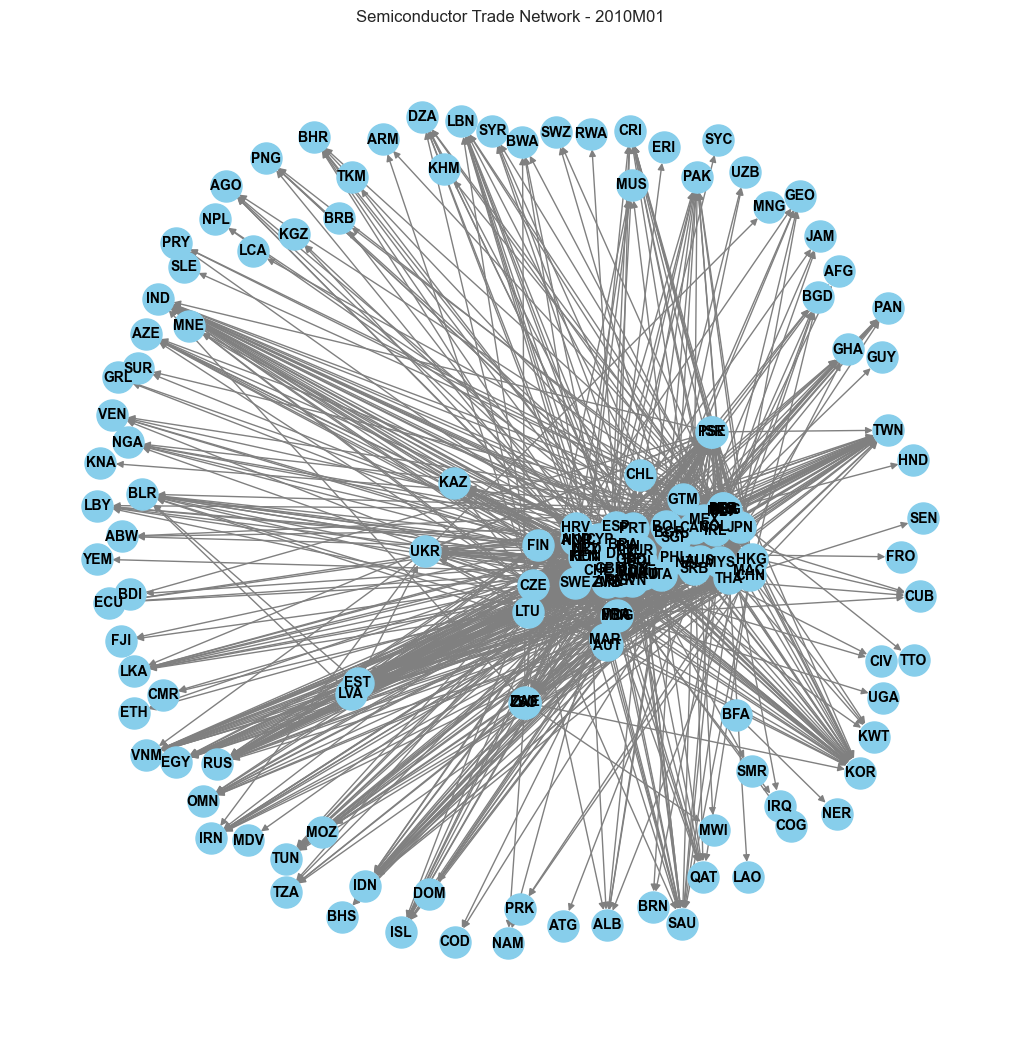

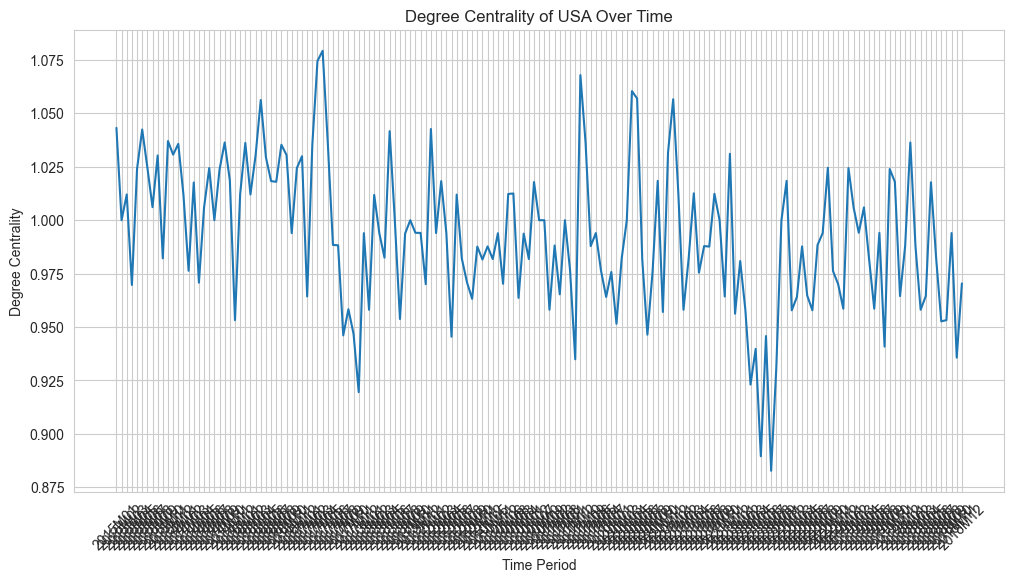

In [30]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Ensure 'Period' column is treated as a string
df['Period'] = df['Period'].astype(str)

def create_network(df, period):
    # Filter the DataFrame for the given period
    df_period = df[df['Period'] == period]
    
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add edges to the graph
    for index, row in df_period.iterrows():
        G.add_edge(row['ReporterISO'], row['PartnerISO'], weight=row['PrimaryValue'])
        
    return G

# Example: Create a network for '2010M01'
G_2010M01 = create_network(df, '2010M01')

# Get unique periods
unique_periods = df['Period'].unique()

# Dictionary to store networks
networks = {}

for period in unique_periods:
    networks[period] = create_network(df, period)

# Example analysis for each period
degree_centralities = {}
betweenness_centralities = {}

for period, G in networks.items():
    degree_centralities[period] = nx.degree_centrality(G)
    betweenness_centralities[period] = nx.betweenness_centrality(G, weight='weight')

# Display results for a specific period
print("Degree Centrality for 2010M01:", degree_centralities['2010M01'])
print("Betweenness Centrality for 2010M01:", betweenness_centralities['2010M01'])

def visualize_network(G, period):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, k=0.15)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
    plt.title(f"Semiconductor Trade Network - {period}")
    plt.show()

# Example: Visualize network for '2010M01'
visualize_network(networks['2010M01'], '2010M01')

# Tracking degree centrality of a specific country over time
country = 'USA'
degree_centrality_over_time = {period: dc.get(country, 0) for period, dc in degree_centralities.items()}

# Plotting degree centrality over time
plt.figure(figsize=(12, 6))
plt.plot(list(degree_centrality_over_time.keys()), list(degree_centrality_over_time.values()))
plt.xlabel('Time Period')
plt.ylabel('Degree Centrality')
plt.title(f'Degree Centrality of {country} Over Time')
plt.xticks(rotation=45)
plt.show()
